In [10]:
import pandas
sbnight = "/home/aholaj/Samille/filtered/LVL3Night_complete_filtered.csv"
sbday = "/home/aholaj/Samille/filtered/LVL3Day_complete_filtered.csv"
salsanight = "/home/aholaj/Samille/filtered/LVL4Night_complete_filtered.csv"
salsaday = "/home/aholaj/Samille/filtered/LVL4Day_complete_filtered.csv"
import matplotlib
import numpy
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.pyplot.style.use("seaborn-paper")
df = pandas.read_csv(sbday)
%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn

In [ ]:
r2 = {'linearFitLVL3Night': 0.3582078533529635, 'correctedLinearFitLVL3Night': 0.7782018147409533, 'emulatorLVL3Night': 0.7422613646463478, 'linearFitLVL3Day': 0.670799580719632, 'correctedLinearFitLVL3Day': 0.8456380714759834, 'emulatorLVL3Day': 0.8267634975606296, 'linearFitLVL4Night': 0.2581694905216796, 'correctedLinearFitLVL4Night': 0.4342511883640014, 'emulatorLVL4Night': 0.3980800046698174, 'linearFitLVL4Day': 0.5427434819296493, 'correctedLinearFitLVL4Day': 0.6039061597272621, 'emulatorLVL4Day': 0.5075758647033094}


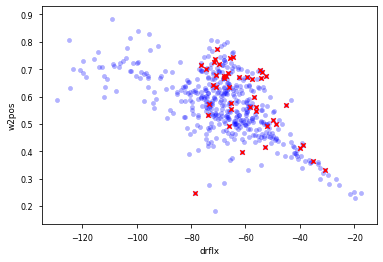

In [8]:
df.plot.scatter(x="drflx", y="w2pos", c = "blue", alpha = 0.3)
ax = matplotlib.pyplot.gca()
df[df["pblh_m"] < 500].plot.scatter(x="drflx", y="w2pos", c = "red", marker = "x", ax = ax)


In [251]:
print(df.keys())

Index(['ID', 'LABEL', 'COLOR', 'FOLDER', 'q_inv', 'tpot_inv', 'lwp',
       'tpot_pbl', 'pblh', 'cdnc', 'pblh_m', 'cond', 'sedi', 'coag', 'auto',
       'diag', 'prcp', 'wpos', 'w2pos', 'cdnc_p', 'cdnc_wp', 'n', 'drflx', 'm',
       'responseIndicator', 'lwpEndValue', 'lwpRelativeChange',
       'cloudTopRelativeChange', 'cfracEndValue',
       'responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;.',
       'emulatorFOLD', 'linearFitFOLD', 'correctedLinearFitFOLD',
       'responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._Emulated',
       'responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._LinearFit',
       'responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._CorrectedLinearFit',
       'tpot_inv_low_tail', 'q_inv_low_tail', 'pblh_low_tail', 'lwp_low_tail',
       'cdnc_low_tail', 'tpot_pbl_low_tail',
       'cloudTopRelativeChange_high_tail', 'lwpRelativeC

In [252]:
df["ttt"] = (df["tpot_inv"] - df["tpot_inv"].mean())/df["tpot_inv"].std()

In [253]:
df["tpot"] = df["tpot_pbl"]

In [11]:
df["tinv"]=df["tpot_inv"]
df["cos"]=df["cos_mu"]
df["qinv"] = df["q_inv"]
df["logLWP"] = numpy.log(df["lwp"])
df["logCDNC"] = numpy.log(df["cdnc"])

-6.296587538575388

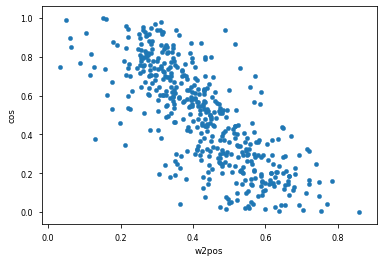

In [15]:
df.plot.scatter(x="w2pos", y="cos")
from sklearn.metrics import r2_score
r2_score(df["w2pos"], df["cos"])

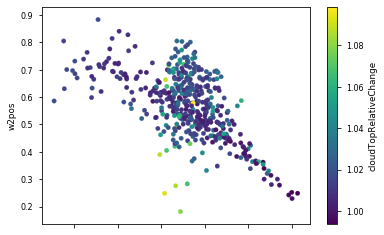

In [255]:
df.plot.scatter(x="drflx", y="w2pos", c = "cloudTopRelativeChange", colormap="viridis")

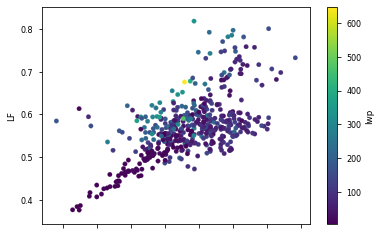

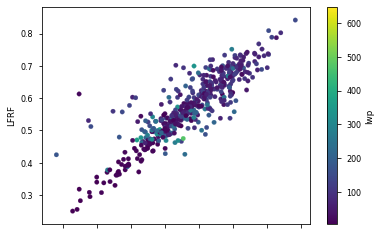

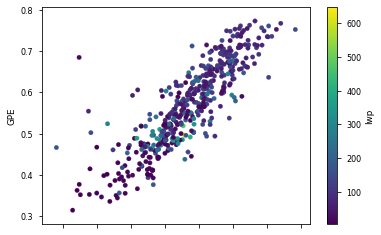

In [256]:
df["LF"] = df['responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._LinearFit']
df["GPE"] = df['responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._Emulated']
df["LFRF"] = df['responseVariablew2pos:cfracEndValue>=0.61;cloudTopRelativeChange<=1.1;w2pos!=-999;._CorrectedLinearFit']
for yy in ["LF", "LFRF", "GPE"]:
    df.plot.scatter(x="w2pos", y=yy, c = "lwp", colormap ="viridis")

In [257]:
df["simulVSlf"] = df["w2pos"] / df["LF"]


tpot
287.9275310645669 299.07981262207034


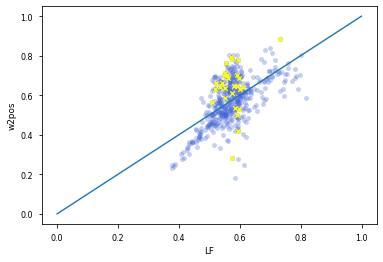

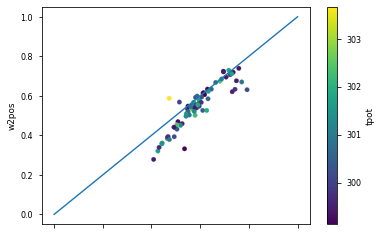

In [261]:

for cc in ["tpot", "logLWP", "pblh", "tinv", "logCDNC", "cos", "qinv"][:1]:
    print(cc)
    
    
    df.plot.scatter(x="LF", y="w2pos", c = "#4363d8", alpha = 0.3)
    
    ax = matplotlib.pyplot.gca()
    ax.plot([0,1], [0,1])
    subdf = df[df["tpot"]<273]
    subdf.plot.scatter(ax= ax, x="LF", y="w2pos", c = "yellow",marker="x")
    
    
    print(df["tpot"].mean(), df["tpot"].quantile(0.85))
    subdf2 = df[ (df["tpot"]>df["tpot"].quantile(0.85))  ] #& (df["LF"] > df["w2pos"])
    subdf2.plot.scatter(x="LF", y="w2pos", c = cc, colormap="viridis")
    
    ax = matplotlib.pyplot.gca()
    ax.plot([0,1], [0,1])
    
    


In [262]:
len(subdf)

28

In [259]:
df[ (df["tpot"]<273) & (df["LF"] < df["w2pos"]) ]

,ID,LABEL,COLOR,FOLDER,q_inv,tpot_inv,lwp,tpot_pbl,pblh,cdnc,...,ttt,tpot,tinv,qinv,logLWP,logCDNC,LF,GPE,LFRF,simulVSlf
1,3N_004,3N_004,#d62728,/home/aholaj/mounttauskansiot/eclairmount/case...,0.165187,8.612289,224.554095,254.464371,172.087329,23.795608,...,-0.620516,254.464371,8.612289,0.165187,5.414117,3.169501,0.559465,0.588066,0.557817,1.258292
62,3N_068,3N_068,#7f7f7f,/home/aholaj/mounttauskansiot/eclairmount/case...,0.807146,12.737732,120.124323,272.254089,173.131657,34.963564,...,0.297651,272.254089,12.737732,0.807146,4.788527,3.554306,0.547909,0.737312,0.655917,1.278668
74,3N_081,3N_081,#1f77b4,/home/aholaj/mounttauskansiot/eclairmount/case...,0.169440,11.406311,93.081219,269.038147,172.501204,35.166012,...,0.001327,269.038147,11.406311,0.169440,4.533472,3.560080,0.522265,0.695238,0.639741,1.271263
78,3N_085,3N_085,#9467bd,/home/aholaj/mounttauskansiot/eclairmount/case...,0.662853,7.255829,107.736377,272.372955,213.472664,36.788664,...,-0.922413,272.372955,7.255829,0.662853,4.679687,3.605190,0.553141,0.680363,0.667622,1.147769
102,3N_110,3N_110,#17becf,/home/aholaj/mounttauskansiot/eclairmount/case...,0.180450,6.330536,214.338728,261.865540,171.983040,24.466812,...,-1.128348,261.865540,6.330536,0.180450,5.367558,3.197318,0.581854,0.585400,0.525087,1.108301
158,3N_170,3N_170,#17becf,/home/aholaj/mounttauskansiot/eclairmount/case...,1.074036,10.777283,69.437235,272.931641,216.476450,43.497332,...,-0.138671,272.931641,10.777283,1.074036,4.240423,3.772700,0.561387,0.699467,0.659939,1.219725
166,3N_178,3N_178,#7f7f7f,/home/aholaj/mounttauskansiot/eclairmount/case...,0.349713,4.771240,138.123682,268.754028,167.079387,35.345668,...,-1.475389,268.754028,4.771240,0.349713,4.928150,3.565176,0.574790,0.608738,0.611519,1.065778
185,3N_200,3N_200,#17becf,/home/aholaj/mounttauskansiot/eclairmount/case...,0.575664,7.753784,70.959773,264.625244,217.102607,23.117058,...,-0.811587,264.625244,7.753784,0.575664,4.262113,3.140571,0.554431,0.716697,0.713659,1.378838
194,3N_209,3N_209,#bcbd22,/home/aholaj/mounttauskansiot/eclairmount/case...,1.646387,12.735779,145.548866,271.378052,221.719358,26.291804,...,0.297216,271.378052,12.735779,1.646387,4.980512,3.269257,0.732638,0.753233,0.841928,1.206008
200,3N_215,3N_215,#9467bd,/home/aholaj/mounttauskansiot/eclairmount/case...,0.715914,11.800385,25.395751,271.661194,129.982094,22.318826,...,0.089033,271.661194,11.800385,0.715914,3.234582,3.105431,0.533596,0.629075,0.665786,1.204788


In [260]:
print(subdf[['q_inv', 'tpot_inv', 'lwp',
       'tpot_pbl', 'pblh', 'cdnc', 'cos_mu', 'pblh_m', 
        'prcp', 'wpos', 'w2pos', 
       'drflx', 'm', 'responseIndicator', 'lwpEndValue', 'lwpRelativeChange',
       'cloudTopRelativeChange', 'cfracEndValue',
       ]])

KeyError: "['cos_mu'] not in index"

In [ ]:
for xx in ["tpot", "logLWP", "pblh", "tinv", "logCDNC", "cos", "qinv", "drflx"]:
    df.plot.scatter(x=xx, y="simulVSlf", c = "tpot", colormap="viridis", ylim = [0.2, 1.6])

In [ ]:
df.plot.scatter(x = "tpot", y="drflx", c= "qinv", colormap = "viridis")

In [ ]:
df[(df["tpot"]>df["tpot"].quantile(0.85)) & (df["LF"] > df["w2pos"])].plot.scatter(x = "cloudTopRelativeChange", y= "drflx", c= "tpot", colormap="viridis")

In [ ]:
pp=df[(df["tpot"]>df["tpot"].quantile(0.85)) & (df["LF"] > df["w2pos"])]

In [ ]:
pp[['q_inv', 'tpot_inv', 'lwp',
       'tpot_pbl', 'cdnc', 'cos_mu', 'pblh_m', 
        'prcp', 'w2pos', 
       'drflx', 'lwpEndValue', 'lwpRelativeChange',
       'cloudTopRelativeChange', 'cfracEndValue',
       ]]

In [ ]:
df["lwpRelativeChange"].plot.hist()

In [ ]:
pp["lwpRelativeChange"].plot.hist()

In [ ]:
sklearn.metrics.mean_squared_error(df[df["simulVSlf"] < 2]["drflx"], df[df["simulVSlf"] < 2]["tpot"], squared=False)